In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def euclidean_distance(x1, x2):
    """Calcula a Distância Euclidiana (d(x, y))."""
    return np.sqrt(np.sum((x1 - x2)**2))

In [3]:
def cosine_dissimilarity(x1, x2):
    """Calcula a Dissimilaridade do Cosseno (d(x, y))."""
    norm_x1 = np.linalg.norm(x1)
    norm_x2 = np.linalg.norm(x2)
    
    if norm_x1 == 0 or norm_x2 == 0:
        return 1.0 
    
    cosine_similarity = np.dot(x1, x2) / (norm_x1 * norm_x2)
    return 1 - cosine_similarity

In [4]:

class KNNRegressor:
    """Implementação do KNN Regressor com métricas configuráveis."""
    
    def __init__(self, k=5, metric='euclidean'):
        """
        Construtor.
        :param k: Número de vizinhos mais próximos.
        :param metric: Métrica de distância ('euclidean' ou 'cosine').
        """
        self.k = k
        if metric == 'euclidean':
            self.distance_func = euclidean_distance
        elif metric == 'cosine':
            self.distance_func = cosine_dissimilarity
        else:
            raise ValueError("Métrica de distância não suportada. Use 'euclidean' ou 'cosine'.")
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """Treina o modelo (apenas armazena os dados)."""
        self.X_train = X
        self.y_train = y
    
    def _predict_single(self, x_test):
        """Prevê o rótulo para um único ponto de teste, usando a média dos k vizinhos."""
        distances = []
        
        for i, x_train in enumerate(self.X_train):
            dist = self.distance_func(x_test, x_train)
            distances.append((dist, self.y_train[i]))
            
        distances.sort(key=lambda x: x[0])
        k_neighbors = distances[:self.k]
        
        k_labels = [neighbor[1] for neighbor in k_neighbors]
        return np.mean(k_labels)

    def predict(self, X):
        """Prevê os rótulos para um conjunto de dados X de teste."""
        predictions = []
        for x_test in X:
            predictions.append(self._predict_single(x_test))
            
        return np.array(predictions)

In [5]:
class NormalLinearRegression:
    """Implementação da Regressão Linear usando a Equação Normal."""
    
    def __init__(self):
        self.coefficients = None
        self.intercept = None
        self.w = None

    def fit(self, X, y):
        """
        Calcula os pesos (w) usando a equação normal: w = (X^T X)^-1 X^T y.
        A coluna de 1s (bias/intercept) é adicionada ao X.
        """
        X_with_bias = np.insert(X, 0, 1, axis=1)
        
        # Calcular os pesos (w)
        pseudo_inverse = np.linalg.pinv(X_with_bias.T @ X_with_bias) @ X_with_bias.T
        self.w = pseudo_inverse @ y
        
        # Separar intercept e coefficients
        self.intercept = self.w[0]
        self.coefficients = self.w[1:]
    
    def predict(self, X):
        """Retorna as previsões: Y_hat = X * coefficients + intercept."""
        X_with_bias = np.insert(X, 0, 1, axis=1)
        
        return X_with_bias @ self.w

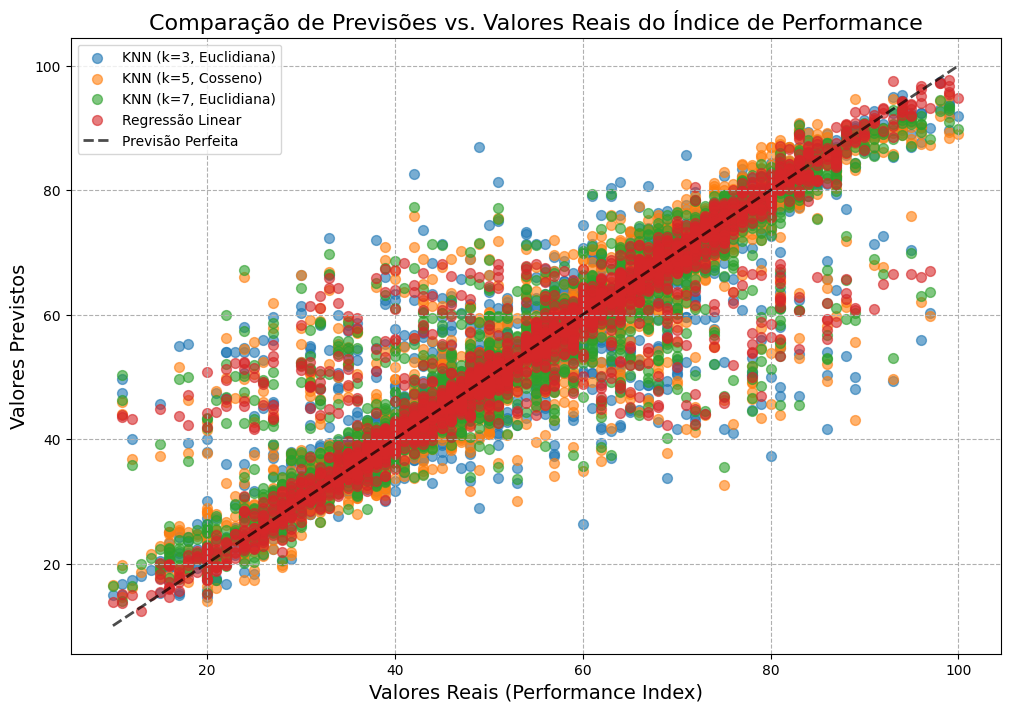

In [6]:
df_clean = pd.read_csv("StudentPerformance_limpo.csv")

X = df_clean.drop(columns=['Performance_Index', 'practice_per_hour']).values
y = df_clean['Performance_Index'].values

np.random.seed(42) 
test_ratio = 0.2
train_indices = np.random.rand(len(X)) > test_ratio

X_train, X_test = X[train_indices], X[~train_indices]
y_train, y_test = y[train_indices], y[~train_indices]

knn_euclidean_3 = KNNRegressor(k=3, metric='euclidean')
knn_cosine_5 = KNNRegressor(k=5, metric='cosine')
knn_euclidean_7 = KNNRegressor(k=7, metric='euclidean')

linear_reg = NormalLinearRegression()

knn_euclidean_3.fit(X_train, y_train)
knn_cosine_5.fit(X_train, y_train)
knn_euclidean_7.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)

y_pred_knn3 = knn_euclidean_3.predict(X_test)
y_pred_knn5 = knn_cosine_5.predict(X_test)
y_pred_knn7 = knn_euclidean_7.predict(X_test)
y_pred_linreg = linear_reg.predict(X_test)

plt.figure(figsize=(12, 8))

plt.scatter(y_test, y_pred_knn3, label='KNN (k=3, Euclidiana)', alpha=0.6, s=50)
plt.scatter(y_test, y_pred_knn5, label='KNN (k=5, Cosseno)', alpha=0.6, s=50)
plt.scatter(y_test, y_pred_knn7, label='KNN (k=7, Euclidiana)', alpha=0.6, s=50)
plt.scatter(y_test, y_pred_linreg, label='Regressão Linear', alpha=0.6, s=50)

max_val = max(np.max(y_test), np.max(y_pred_linreg))
min_val = min(np.min(y_test), np.min(y_pred_linreg))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.7, linewidth=2, label='Previsão Perfeita')

plt.title('Comparação de Previsões vs. Valores Reais do Índice de Performance', fontsize=16)
plt.xlabel('Valores Reais (Performance Index)', fontsize=14)
plt.ylabel('Valores Previstos', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--')
plt.show()